## Summary Statistics

This notebook creates a box-plot visualization of the variance of different pollutants in each month for different rural areas. The data is read from the corresponding csv file images/<year>_7rural.csv.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn-bright')

In [6]:
year = 2020
df = pd.read_csv(f'data/{year}_7rural.csv')

## A quick look at the data, make sure we understand what's what

In [20]:
df.describe()

,pm25,pm10,o3,no2,so2,co
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,89.875000,51.547115,14.340385,9.868269,4.774038,5.323077
std,52.241441,40.158561,13.157355,7.644971,4.536018,4.980563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,23.000000,2.000000,4.000000,3.000000,2.000000
50%,79.000000,43.000000,11.000000,9.000000,3.000000,4.000000
75%,116.000000,68.000000,25.000000,13.000000,6.000000,7.000000
max,379.000000,365.000000,159.000000,38.000000,49.000000,33.000000


In [21]:
df.head()

,date,pm25,pm10,o3,no2,so2,co,city
0,03/01/2020,98,44,38,17,4,7,coimbatore
1,04/01/2020,102,27,26,30,3,5,coimbatore
2,05/01/2020,66,24,11,16,2,12,coimbatore
3,06/01/2020,62,20,9,19,2,8,coimbatore
4,07/01/2020,53,14,3,17,2,4,coimbatore


In [7]:
## this is because I'm reusing code that calls the 'date' column 'Date'
df.rename(columns = {'date':'Date', 'city':'City'}, inplace=True)
df.head()

,Date,pm25,pm10,o3,no2,so2,co,City
0,03/01/2020,98,44,38,17,4,7,coimbatore
1,04/01/2020,102,27,26,30,3,5,coimbatore
2,05/01/2020,66,24,11,16,2,12,coimbatore
3,06/01/2020,62,20,9,19,2,8,coimbatore
4,07/01/2020,53,14,3,17,2,4,coimbatore


In [23]:
df.dtypes

Date    object
pm25     int64
pm10     int64
o3       int64
no2      int64
so2      int64
co       int64
City    object
dtype: object

OK! Most of the columns seem fine, but the Date is listed as an object. Let's fix this, so we can use this data correctly.

We will want to group the data according to month, so let's also create the corresponding columns.

In [8]:
df.Date = pd.to_datetime(df.Date, format = '%d/%m/%Y') # need the format string to specify which is the month and which is the year
df['month_num'] = pd.DatetimeIndex(df['Date']).month
df['month_name'] = df.Date.dt.month_name()
df.dtypes

Date          datetime64[ns]
pm25                   int64
pm10                   int64
o3                     int64
no2                    int64
so2                    int64
co                     int64
City                  object
month_num              int64
month_name            object
dtype: object

In [25]:
df.head()

,Date,pm25,pm10,o3,no2,so2,co,City,month_num,month_name
0,2020-01-03,98,44,38,17,4,7,coimbatore,1,January
1,2020-01-04,102,27,26,30,3,5,coimbatore,1,January
2,2020-01-05,66,24,11,16,2,12,coimbatore,1,January
3,2020-01-06,62,20,9,19,2,8,coimbatore,1,January
4,2020-01-07,53,14,3,17,2,4,coimbatore,1,January


In [9]:
print(df.shape)
# just keep 2019 data, discard everything else
df = df[df['Date'].dt.year == year]
print(df.shape)

(1040, 10)
(1040, 10)


In [27]:
df.head()

,Date,pm25,pm10,o3,no2,so2,co,City,month_num,month_name
0,2020-01-03,98,44,38,17,4,7,coimbatore,1,January
1,2020-01-04,102,27,26,30,3,5,coimbatore,1,January
2,2020-01-05,66,24,11,16,2,12,coimbatore,1,January
3,2020-01-06,62,20,9,19,2,8,coimbatore,1,January
4,2020-01-07,53,14,3,17,2,4,coimbatore,1,January


In [10]:
#just to make this generic
cities = df.City.unique()
pollutants = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

print(cities)
print(pollutants)

## 24-hour means unless otherwise specified. Using 8-hour as a proxy when unavailable
pollutant_who = {}
pollutant_who['co']   = 0
pollutant_who['no2']  = 0
pollutant_who['o3']   = 100 ##  8-hour mean
pollutant_who['pm10'] = 50
pollutant_who['pm25'] = 25
pollutant_who['so2']  = 20  

## annual in 'industrial, residential, rural, others' areas
pollutant_naaqs = {}
pollutant_naaqs['co']   = 2   ##  8-hour mean
pollutant_naaqs['no2']  = 80
pollutant_naaqs['o3']   = 100 ##  8-hour mean
pollutant_naaqs['pm10'] = 100
pollutant_naaqs['pm25'] = 60
pollutant_naaqs['so2']  = 80  


['coimbatore' 'guwahati' 'jabalpur' 'kota' 'mussoorie' 'vapi']
['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']


---

I'm really, really partial to making grids of plots myself!

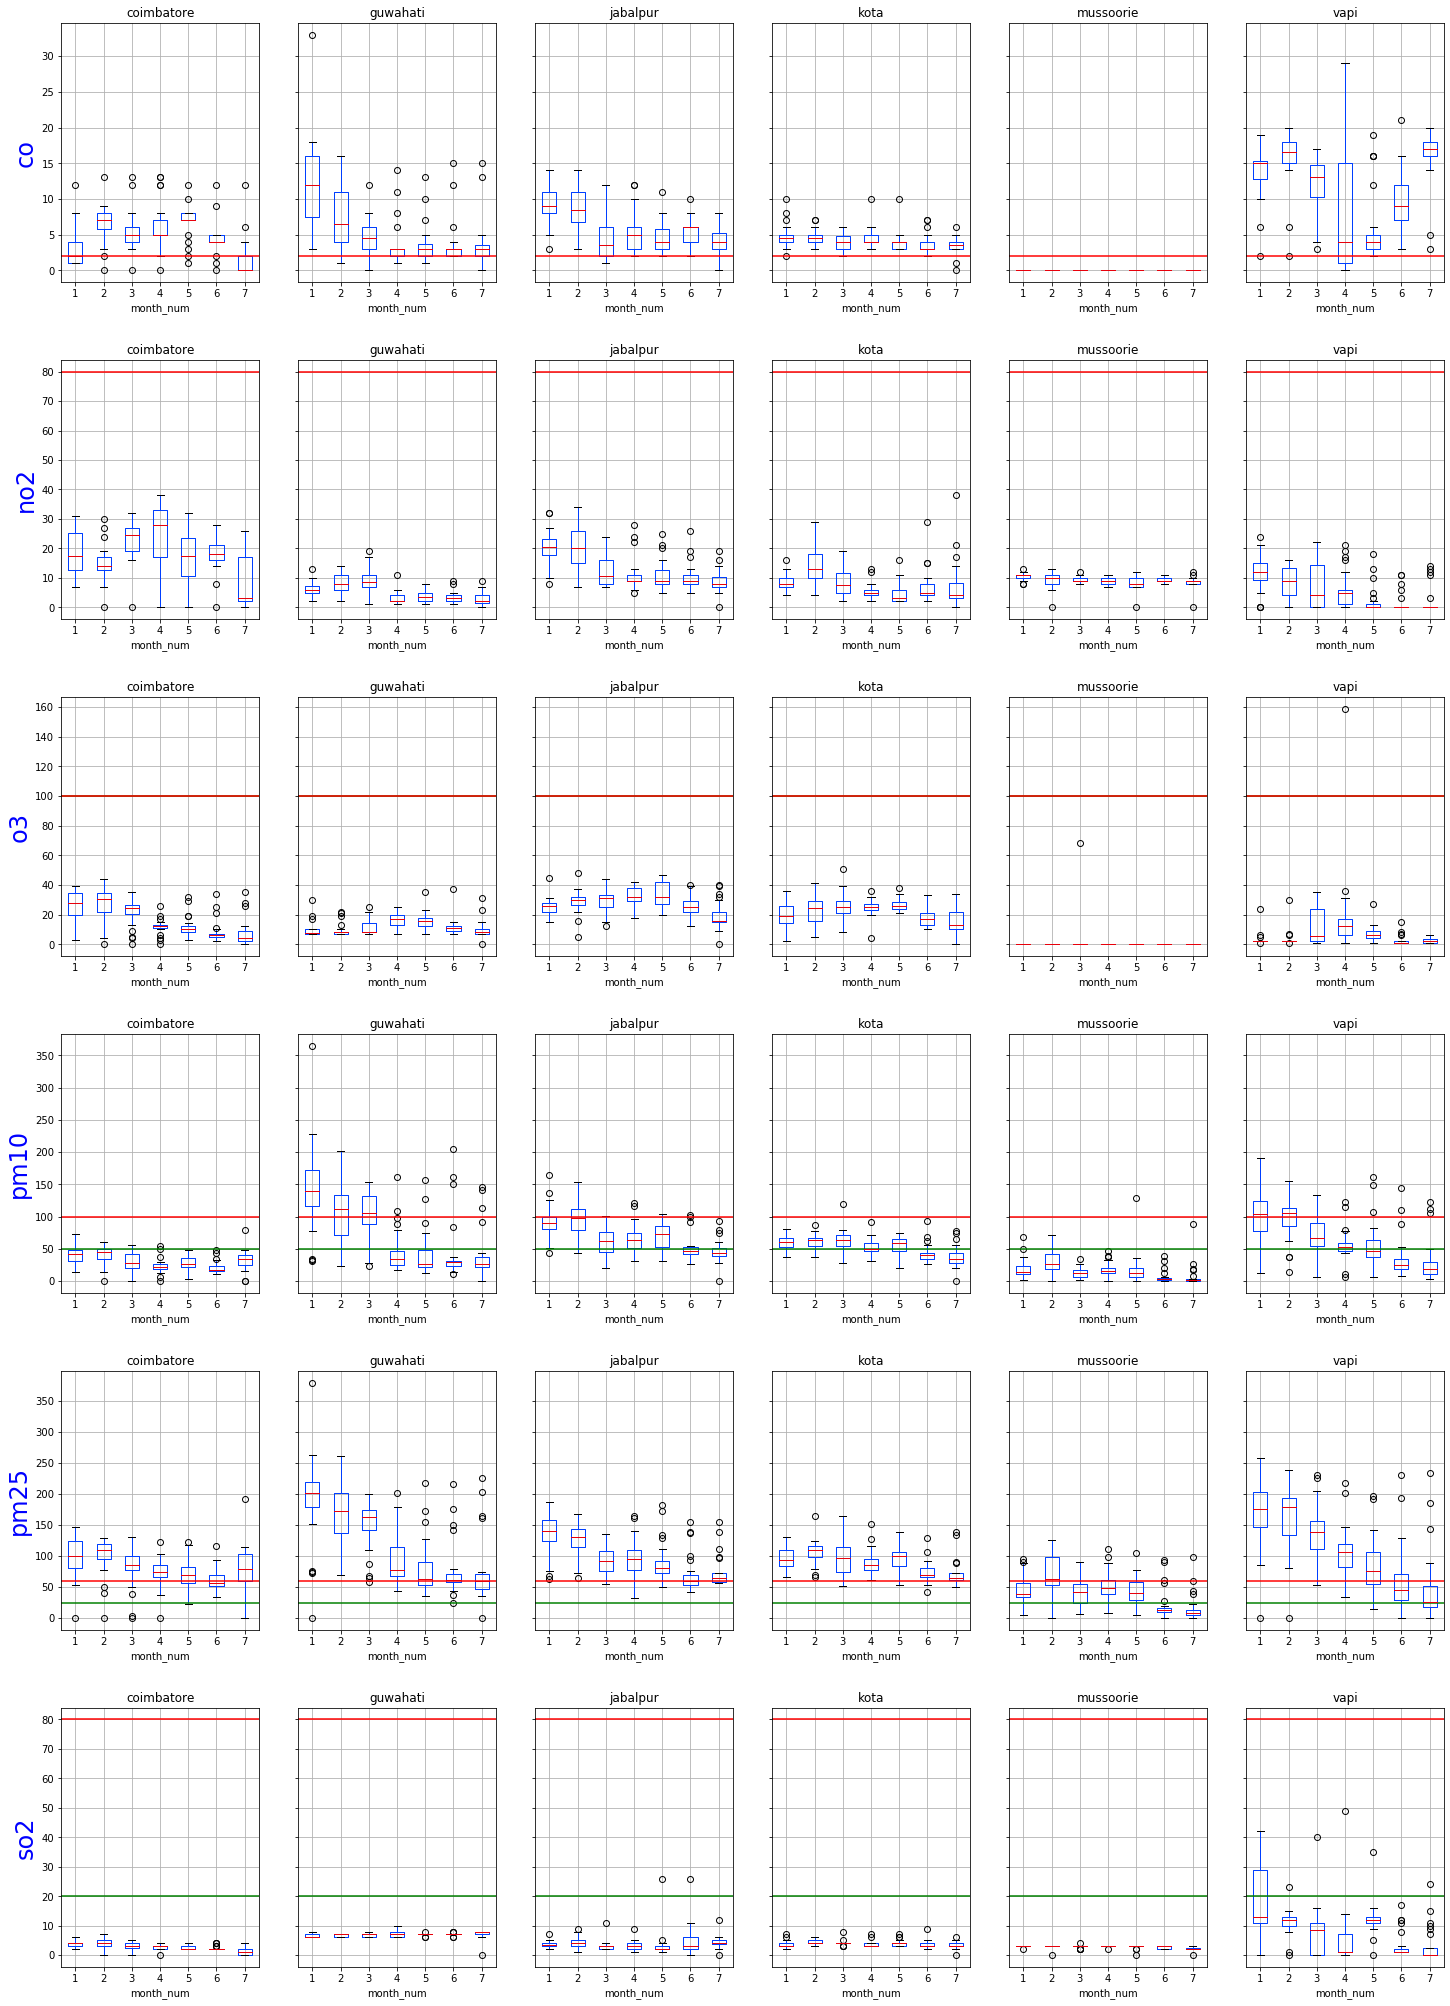

In [11]:
fig, ax = plt.subplots(len(pollutants), len(cities), figsize=(24,36), sharey='row')
plt.subplots_adjust(hspace=0.3) ## the hspace value is a fraction of the average axes height

for i, p in enumerate(pollutants):
    for j, c in enumerate(cities):
        a = ax[i][j] # figure out the axes to use
        df[df.City == c].boxplot(column=p, by='month_num', ax=a)
        if pollutant_who[p]:
            a.axhline(y=pollutant_who[p], c='g')
        if pollutant_naaqs[p]:
            a.axhline(y=pollutant_naaqs[p], c='r')
        a.set_title(c)

for a, r in zip(ax[:,0], pollutants):
    a.set_ylabel(r, rotation=90, fontsize=24, color='b')
    
#plt.title('') # SKK: I need to figure this out. If I uncomment this line, the argument shows up as the title of the last subfigure!
plt.suptitle('')
plt.show()
fig.savefig(f'images/boxplot-pollutants-rural-{year}.png', bbox_inches='tight')
plt.close()

And finally, we can plot these per city:

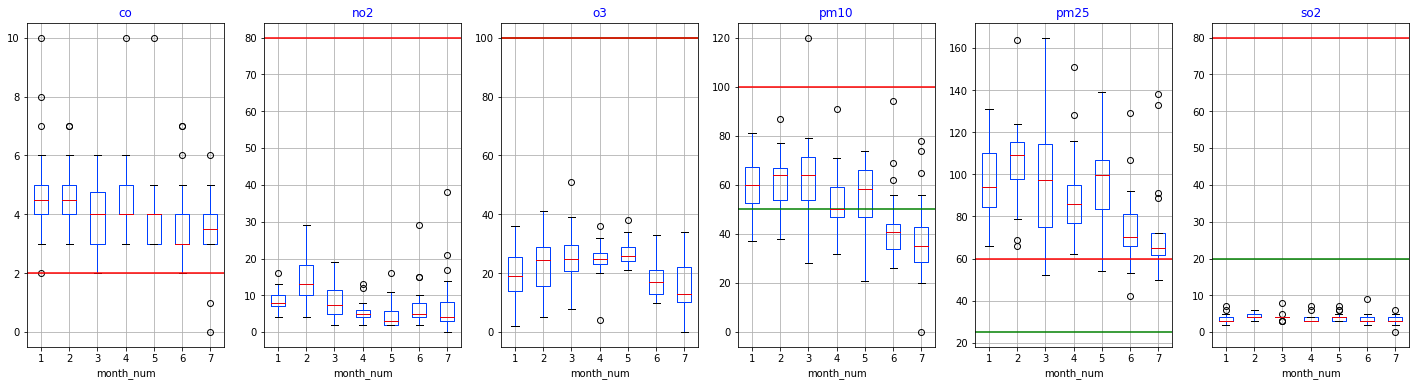

In [12]:
fig, ax = plt.subplots(1, len(pollutants), figsize=(24,6))

city = 'kota'
for i, p in enumerate(pollutants):
    a = ax[i]
    df[df.City == city].boxplot(column=p, by='month_num', ax=a)
    a.set_title(p, color='blue')
    if pollutant_who[p]:
        a.axhline(y=pollutant_who[p], c='g')
    if pollutant_naaqs[p]:
        a.axhline(y=pollutant_naaqs[p], c='r')
plt.suptitle('')
plt.show()
#plt.savefig(f'images/Delhi-poll-{year}.png')

In [13]:
## individual plots of pollutants for each city
for c in cities:
    fig, ax = plt.subplots(1, len(pollutants), figsize=(24,6))
    for i, p in enumerate(pollutants):
        a = ax[i]
        df[df.City == c].boxplot(column=p, by='month_num', ax=a)
        a.set_title(p, color='blue')
        if pollutant_who[p]:
            a.axhline(y=pollutant_who[p], c='g')
        if pollutant_naaqs[p]:
            a.axhline(y=pollutant_naaqs[p], c='r')
        plt.suptitle(f'{c}', c='b', fontsize=24)
        plt.savefig(f"images/boxplot-{c}-pollutants-{year}.png")
    plt.close()

In [14]:
## plots of pollutants across cities
for p in pollutants:
    fig, ax = plt.subplots(1, len(cities), figsize=(24,6), sharey=True)
    for i, c in enumerate(cities):
        a = ax[i]
        df[df.City == c].boxplot(column=p, by='month_num', ax=a)
        a.set_title(c)
        if pollutant_who[p]:
            a.axhline(y=pollutant_who[p], c='g')
        if pollutant_naaqs[p]:
            a.axhline(y=pollutant_naaqs[p], c='r')
        plt.suptitle(f'{p}', c='b', fontsize=20)
        plt.savefig(f"images/boxplot-{p}-rural-{year}.png")
    plt.close()


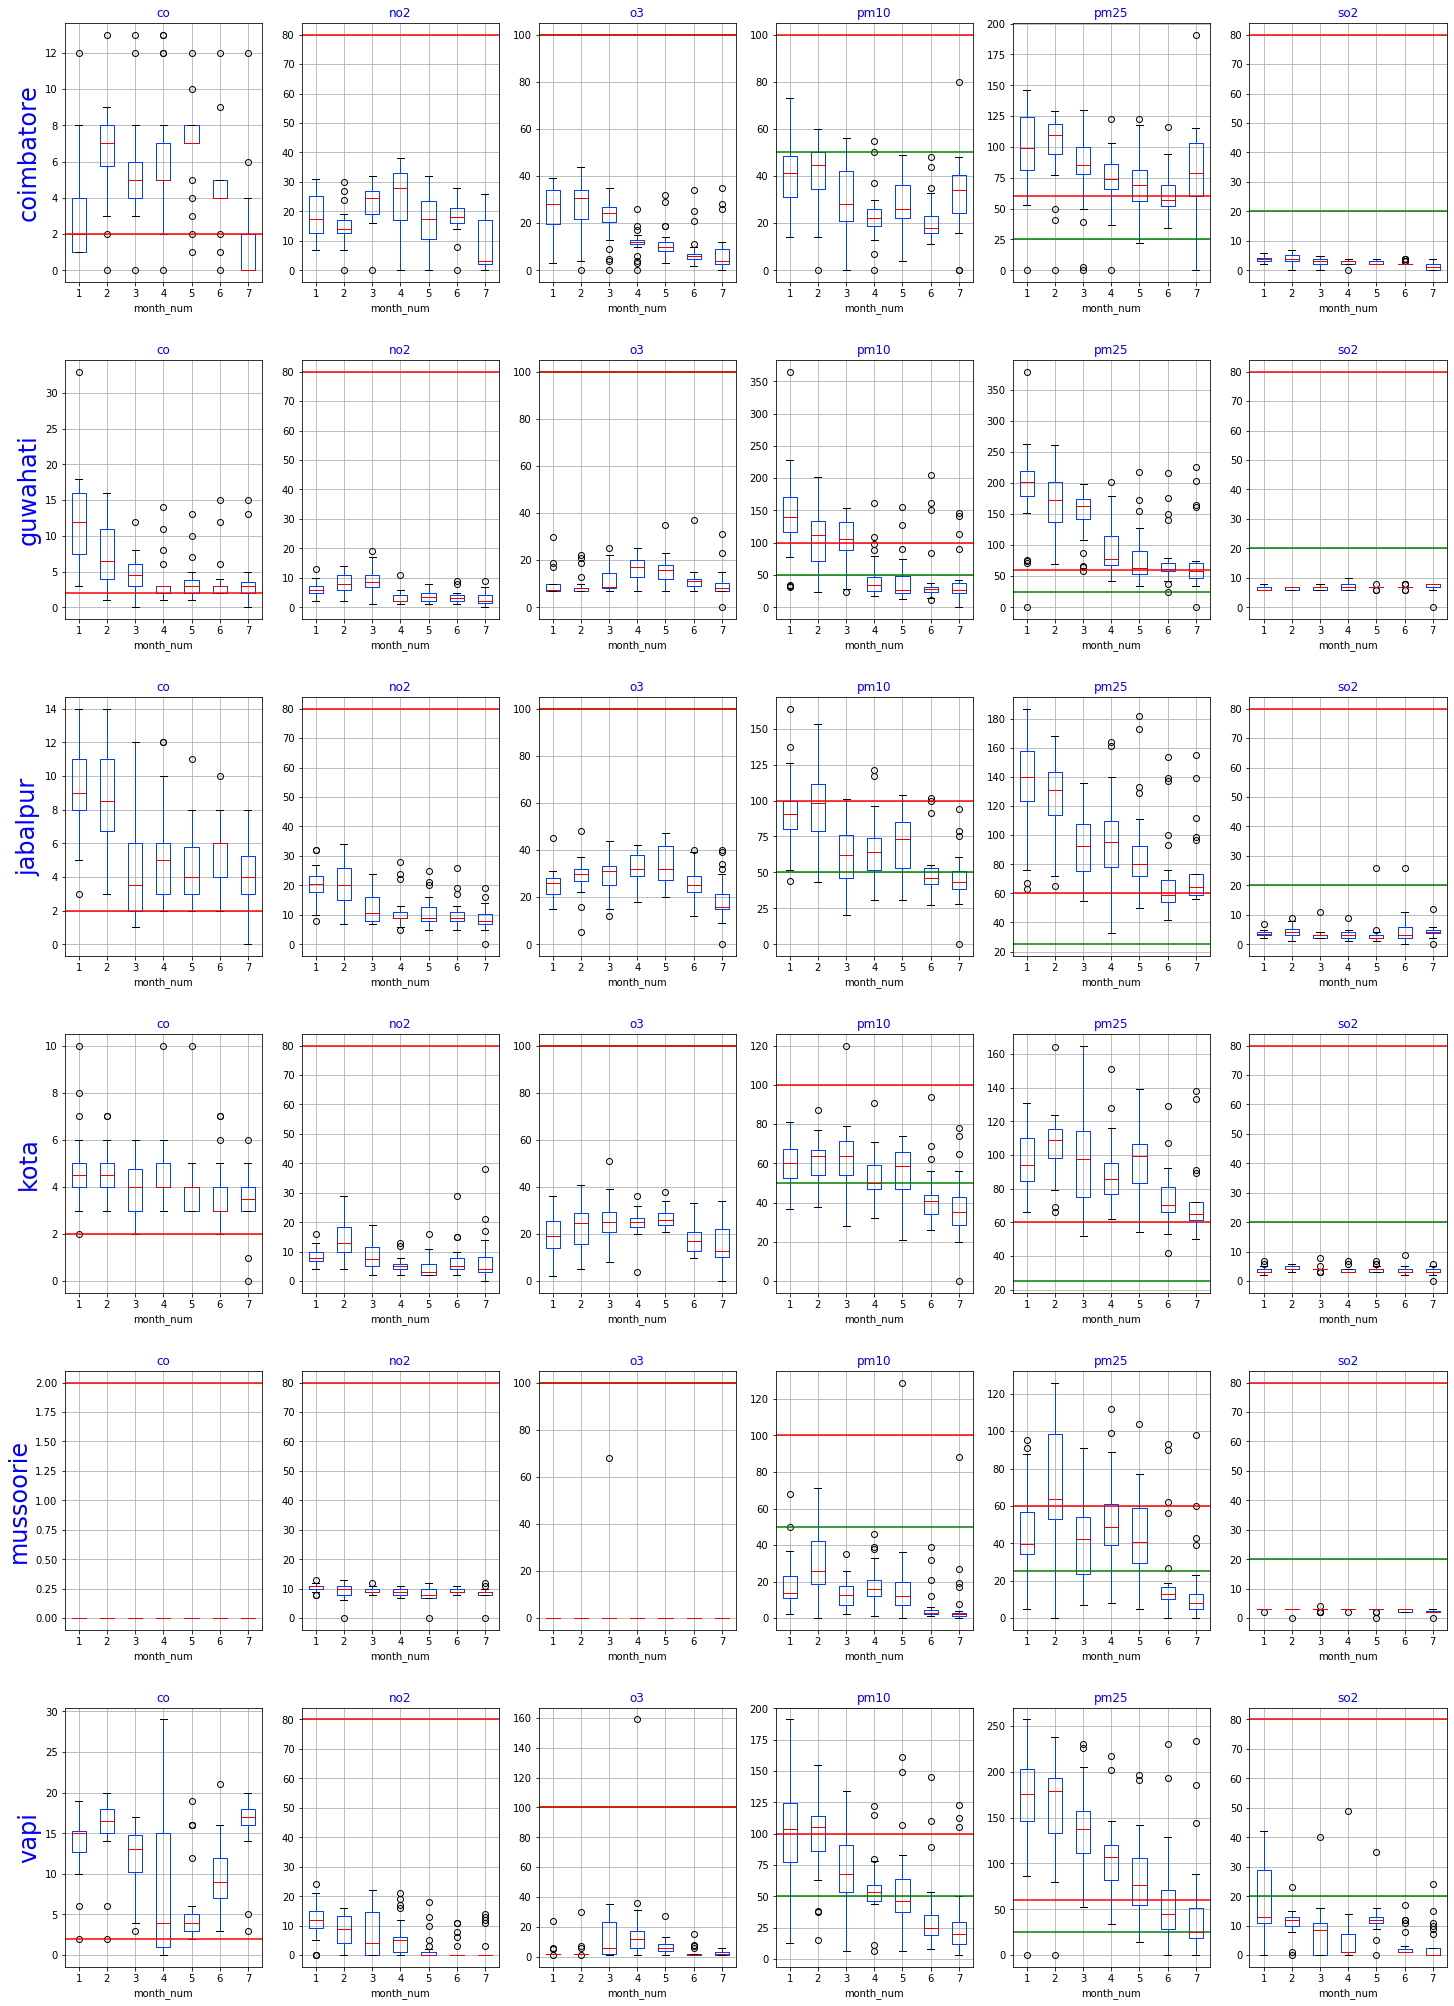

In [15]:
fig, ax = plt.subplots(len(cities), len(pollutants), figsize=(24,36))
plt.subplots_adjust(hspace=0.3)

for i, c in enumerate(cities):
    for j, p in enumerate(pollutants):
        a = ax[i][j]
        df[df.City == c].boxplot(column=p, by='month_num', ax=a)
        a.set_title(p, color='blue')
        if pollutant_who[p]:
            a.axhline(y=pollutant_who[p], c='g')
        if pollutant_naaqs[p]:
            a.axhline(y=pollutant_naaqs[p], c='r')
        
for a, r in zip(ax[:,0], cities):
    a.set_ylabel(r, rotation=90, fontsize=24, color='b')
    
plt.suptitle('')
plt.show()
fig.savefig(f'images/boxplot-rural-pollutants-{year}.png', bbox_inches='tight')
plt.close()